# 4.2

4.2.1

In [1]:
import pandas as pd
col_Names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)",'type']
iris_data=pd.read_csv('data/iris.data.csv',names=col_Names)

In [2]:
df_iris=pd.DataFrame(iris_data)

In [3]:
type=list(set(df_iris.type))

In [4]:
type

['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

In [5]:
import numpy as np
iris_data=np.asarray(iris_data)

In [6]:
set_data=[a for a in iris_data if a[4]=='Iris-setosa']
ver_data=[a for a in iris_data if a[4]=='Iris-versicolor']
cir_data=[a for a in iris_data if a[4]=='Iris-virginica']

In [7]:
set_data=np.asarray(set_data)
ver_data=np.asarray(ver_data)
cir_data=np.asarray(cir_data)

In [8]:
set_data.shape

(50, 5)

In [9]:
setosa=set_data[:,:4]
versicolor=ver_data[:,:4]
virginica=cir_data[:,:4]

In [10]:
se_mean1=np.mean(setosa.T[0])
se_mean2=np.mean(setosa.T[1])
se_mean3=np.mean(setosa.T[2])
se_mean4=np.mean(setosa.T[3])

ve_mean1=np.mean(versicolor.T[0])
ve_mean2=np.mean(versicolor.T[1])
ve_mean3=np.mean(versicolor.T[2])
ve_mean4=np.mean(versicolor.T[3])

vi_mean1=np.mean(virginica.T[0])
vi_mean2=np.mean(virginica.T[1])
vi_mean3=np.mean(virginica.T[2])
vi_mean4=np.mean(virginica.T[3])

In [11]:
se_mean1
# se_mean2

5.005999999999999

In [12]:
se_mean_vector=[se_mean1,se_mean2,se_mean3,se_mean4]
ve_mean_vector=[ve_mean1,ve_mean2,ve_mean3,ve_mean4]
vi_mean_vector=[vi_mean1,vi_mean2,vi_mean3,vi_mean4]

In [13]:
se_mean_vector=np.asarray(se_mean_vector)
ve_mean_vector=np.asarray(ve_mean_vector)
vi_mean_vector=np.asarray(vi_mean_vector)

In [14]:
se_mean_vector.shape

(4,)

In [15]:
se_dev=[]
ve_dev=[]
vi_dev=[]
for i in range(len(setosa)):
    dev1=setosa[i]-se_mean_vector
    dev2=versicolor[i]-ve_mean_vector
    dev3=virginica[i]-vi_mean_vector
    se_dev.append(dev1)
    ve_dev.append(dev2)
    vi_dev.append(dev3)
se_dev=np.asarray(se_dev)
ve_dev=np.asarray(ve_dev)
vi_dev=np.asarray(vi_dev)

In [16]:
S_se=np.dot(se_dev.T,se_dev)
S_ve=np.dot(ve_dev.T,ve_dev)
S_vi=np.dot(vi_dev.T,vi_dev)

In [17]:
S_w=S_se+S_ve+S_vi

In [18]:
S_w.shape

(4, 4)

In [19]:
m1=[se_mean1,ve_mean1,vi_mean1]
m2=[se_mean2,ve_mean2,vi_mean2]
m3=[se_mean3,ve_mean3,vi_mean3]
m4=[se_mean4,ve_mean4,vi_mean4]
mean_vec=[np.mean(m1),np.mean(m2),np.mean(m3),np.mean(m4)]

In [20]:
mean_vec=np.asarray(mean_vec)

In [21]:
mean_vec

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [22]:
d1=se_mean_vector-mean_vec
d2=ve_mean_vector-mean_vec
d3=vi_mean_vector-mean_vec
d1=np.asarray(d1).reshape(4,1)
d2=np.asarray(d2).reshape(4,1)
d3=np.asarray(d3).reshape(4,1)
S_B1=len(setosa)*np.dot(d1,d1.T)
S_B2=len(versicolor)*np.dot(d2,d2.T)
S_B3=len(virginica)*np.dot(d3,d3.T)
S_B=(1/3)*S_B1+(1/3)*S_B2+(1/3)*S_B3

In [23]:
import matplotlib.pyplot as plt



In [24]:
SW_matrix=np.asmatrix(S_w,dtype='float')
SW_inverse=(SW_matrix).I
SB_matrix=np.matrix(S_B)
A=SW_inverse@SB_matrix
M=np.array(A)

In [25]:
SB_matrix

matrix([[ 21.07071111,  -6.51133333,  55.05488889,  23.78768889],
        [ -6.51133333,   3.6592    , -18.68506667,  -7.49746667],
        [ 55.05488889, -18.68506667, 145.54791111,  62.30271111],
        [ 23.78768889,  -7.49746667,  62.30271111,  26.86804444]])

In [26]:
SW_matrix

matrix([[38.9562, 13.683 , 24.614 ,  5.6556],
        [13.683 , 17.035 ,  8.12  ,  4.9132],
        [24.614 ,  8.12  , 27.22  ,  6.2536],
        [ 5.6556,  4.9132,  6.2536,  6.1756]])

In [27]:
SW_inverse

matrix([[ 0.07395399, -0.03705648, -0.06129209,  0.02382084],
        [-0.03705648,  0.09760271,  0.01881271, -0.0627651 ],
        [-0.06129209,  0.01881271,  0.10046531, -0.06057014],
        [ 0.02382084, -0.0627651 , -0.06057014,  0.2513825 ]])

In [28]:
from numpy import linalg as LA

In [29]:
w,v=LA.eig(M)
print('the the eigenvalue is \n',w)
print('the eighenvector,also the best weight is \n',v)

the the eigenvalue is 
 [1.07573193e+01 9.25222879e-02 6.37489996e-16 2.29298245e-15]
the eighenvector,also the best weight is 
 [[-0.20490976 -0.00898234 -0.65243798  0.06674523]
 [-0.38714331 -0.58899857 -0.01145214 -0.35848605]
 [ 0.54648218  0.25428655 -0.0773472  -0.42574773]
 [ 0.71378517 -0.76703217  0.75379768  0.82811333]]


In [30]:
for i in range(len(w)):
    eigvector=v[:,i].reshape(4,1)
    print('the the eigenvalue',i+1, 'is \n',w[i])
    print('the eighenvector is \n',eigvector)

the the eigenvalue 1 is 
 10.75731926657661
the eighenvector is 
 [[-0.20490976]
 [-0.38714331]
 [ 0.54648218]
 [ 0.71378517]]
the the eigenvalue 2 is 
 0.09252228794668244
the eighenvector is 
 [[-0.00898234]
 [-0.58899857]
 [ 0.25428655]
 [-0.76703217]]
the the eigenvalue 3 is 
 6.374899957916442e-16
the eighenvector is 
 [[-0.65243798]
 [-0.01145214]
 [-0.0773472 ]
 [ 0.75379768]]
the the eigenvalue 4 is 
 2.2929824473573684e-15
the eighenvector is 
 [[ 0.06674523]
 [-0.35848605]
 [-0.42574773]
 [ 0.82811333]]


In [32]:
w1,v1=LA.eigh(M)
print('the the eigenvalue is \n',w)
print('the eighenvector,also the weight is \n',v)

the the eigenvalue is 
 [1.07573193e+01 9.25222879e-02 6.37489996e-16 2.29298245e-15]
the eighenvector,also the weight is 
 [[-0.20490976 -0.00898234 -0.65243798  0.06674523]
 [-0.38714331 -0.58899857 -0.01145214 -0.35848605]
 [ 0.54648218  0.25428655 -0.0773472  -0.42574773]
 [ 0.71378517 -0.76703217  0.75379768  0.82811333]]


In [54]:
for i in range(len(w)):
    test=np.dot(SB_matrix-w[i]*SW_matrix,v[:,i].reshape(4,1))
    k=np.isclose(test,np.zeros((4,1)))
    print(test)
    print(k)
    

[[-2.84217094e-14]
 [-2.84217094e-14]
 [ 1.42108547e-14]
 [ 1.06581410e-14]]
[[ True]
 [ True]
 [ True]
 [ True]]
[[-7.99360578e-15]
 [-9.76996262e-15]
 [ 1.59872116e-14]
 [ 6.21724894e-15]]
[[ True]
 [ True]
 [ True]
 [ True]]
[[ 1.24344979e-14]
 [-4.44089210e-15]
 [ 1.42108547e-14]
 [ 5.32907052e-15]]
[[ True]
 [ True]
 [ True]
 [ True]]
[[ 1.11022302e-14]
 [ 1.50990331e-14]
 [-1.59872116e-14]
 [-1.77635684e-15]]
[[ True]
 [ True]
 [ True]
 [ True]]


In [33]:
print('(S_B-eig_value*S_W)*eig_vector=0 is true')

(S_B-eig_value*S_W)*eig_vector=0 is true


In [34]:
eig_pairs=[(np.abs(w[i]),v[:,i]) for i in range(len(w))]

In [35]:
eig_pairs

[(10.75731926657661,
  array([-0.20490976, -0.38714331,  0.54648218,  0.71378517])),
 (0.09252228794668244,
  array([-0.00898234, -0.58899857,  0.25428655, -0.76703217])),
 (6.374899957916442e-16,
  array([-0.65243798, -0.01145214, -0.0773472 ,  0.75379768])),
 (2.2929824473573684e-15,
  array([ 0.06674523, -0.35848605, -0.42574773,  0.82811333]))]

In [36]:
eig_pairs=sorted(eig_pairs,reverse=True)

In [37]:
print('eigenvalues in decreasing order:')
for i in eig_pairs:
    print(i[0])

eigenvalues in decreasing order:
10.75731926657661
0.09252228794668244
2.2929824473573684e-15
6.374899957916442e-16


In [38]:
eig_sum=sum(w)

In [39]:
print('eigenvalues explain:')
for i in eig_pairs:
    explained=100*i[0]/eig_sum
    print(explained,'%')

eigenvalues explain:
99.14724756595075 %
0.8527524340492321 %
2.1133787399885347e-14 %
5.875569634709319e-15 %


In [40]:
print('so the optimal direction w* is ',v[:,0])

so the optimal direction w* is  [-0.20490976 -0.38714331  0.54648218  0.71378517]


4.2.2

In [41]:
w_optimal=v[:,0]

In [42]:
w_optimal.shape

(4,)

In [43]:
setosa.shape

(50, 4)

In [44]:
Y_se=np.dot(setosa,w_optimal)
Y_ve=np.dot(versicolor,w_optimal)
Y_vi=np.dot(virginica,w_optimal)

In [45]:
Y_se=np.asarray(Y_se,dtype='float')
Y_ve=np.asarray(Y_ve,dtype='float')
Y_vi=np.asarray(Y_vi,dtype='float')

In [46]:
import matplotlib.pyplot as plt



(array([ 4.,  6., 10.,  9.,  6., 11.,  1.,  2.,  0.,  1.]),
 array([1.48280412, 1.61732922, 1.75185433, 1.88637944, 2.02090454,
        2.15542965, 2.28995476, 2.42447986, 2.55900497, 2.69353007,
        2.82805518]),
 <a list of 10 Patch objects>)

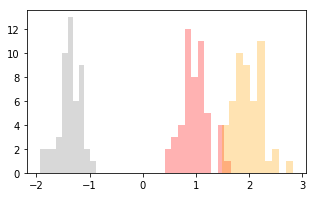

In [48]:
fig,ax=plt.subplots(figsize=(5,3))
ax.hist(Y_se,bins=10,color='grey',alpha=0.3)
ax.hist(Y_ve,bins=10,color='r',alpha=0.3)
ax.hist(Y_vi,bins=10,color='orange',alpha=0.3)





4.2.3

In [55]:
Y_se1=np.dot(setosa,v[:,2])
Y_ve1=np.dot(versicolor,v[:,2])
Y_vi1=np.dot(virginica,v[:,2])

In [56]:
Y_se1=np.asarray(Y_se1,dtype='float')
Y_ve1=np.asarray(Y_ve1,dtype='float')
Y_vi1=np.asarray(Y_vi1,dtype='float')

(array([ 2.,  7.,  1.,  2.,  9., 13.,  7.,  5.,  2.,  2.]),
 array([-4.18520487, -3.99590266, -3.80660045, -3.61729824, -3.42799603,
        -3.23869382, -3.04939162, -2.86008941, -2.6707872 , -2.48148499,
        -2.29218278]),
 <a list of 10 Patch objects>)

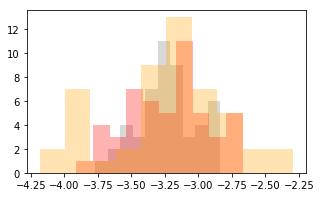

In [58]:
fig,ax=plt.subplots(figsize=(5,3))
ax.hist(Y_se1,bins=10,color='grey',alpha=0.3)
ax.hist(Y_ve1,bins=10,color='r',alpha=0.3)
ax.hist(Y_vi1,bins=10,color='orange',alpha=0.3)

In [49]:
print('if a is random,assuming a is \n[1,2,3,4]\n[10,12,5,3] \nthen new vector is')
a=np.array([1,2,3,4])
b=np.array([10,12,5,3])
w_new=w_optimal+a
w_new1=w_optimal+b
print(w_new,'\n',w_new1)

if a is random,assuming a is 
[1,2,3,4]
[10,12,5,3] 
then new vector is
[0.79509024 1.61285669 3.54648218 4.71378517] 
 [ 9.79509024 11.61285669  5.54648218  3.71378517]


(array([ 1.,  1.,  4., 10.,  8.,  9., 10.,  3.,  2.,  2.]),
 array([108.3006885 , 113.95890048, 119.61711245, 125.27532443,
        130.9335364 , 136.59174838, 142.24996035, 147.90817233,
        153.5663843 , 159.22459628, 164.88280825]),
 <a list of 10 Patch objects>)

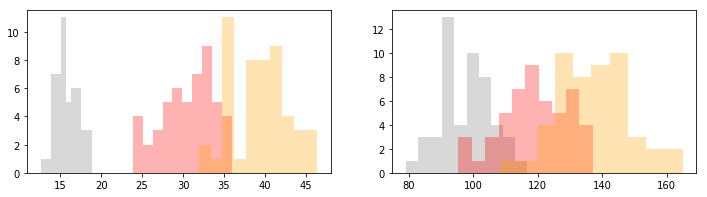

In [53]:
Y_se2=np.dot(setosa,w_new)
Y_ve2=np.dot(versicolor,w_new)
Y_vi2=np.dot(virginica,w_new)
Y_se2=np.asarray(Y_se2,dtype='float')
Y_ve2=np.asarray(Y_ve2,dtype='float')
Y_vi2=np.asarray(Y_vi2,dtype='float')

Y_se3=np.dot(setosa,w_new1)
Y_ve3=np.dot(versicolor,w_new1)
Y_vi3=np.dot(virginica,w_new1)
Y_se3=np.asarray(Y_se3,dtype='float')
Y_ve3=np.asarray(Y_ve3,dtype='float')
Y_vi3=np.asarray(Y_vi3,dtype='float')
fig,ax=plt.subplots(figsize=(12,3),nrows=1,ncols=2)
ax[0].hist(Y_se2,bins=10,color='grey',alpha=0.3)
ax[0].hist(Y_ve2,bins=10,color='r',alpha=0.3)
ax[0].hist(Y_vi2,bins=10,color='orange',alpha=0.3)
ax[1].hist(Y_se3,bins=10,color='grey',alpha=0.3)
ax[1].hist(Y_ve3,bins=10,color='r',alpha=0.3)
ax[1].hist(Y_vi3,bins=10,color='orange',alpha=0.3)

In [59]:
print('but if a is constructed out of other generalised eigenvectors,assuming a is the second vector \nor the sum of the second and third vector,then')
w2=v[:,1]
w3=v[:,1]+v[:,2]
w_prim=w_optimal+w2
w_prim1=w_optimal+w3
print(w_prim,'\n',w_prim1)

but if a is constructed out of other generalised eigenvectors,assuming a is the second vector 
or the sum of the second and third vector,then
[-0.2138921  -0.97614188  0.80076872 -0.053247  ] 
 [-0.86633008 -0.98759403  0.72342153  0.70055068]


Text(0.5,0,'w1 projection')

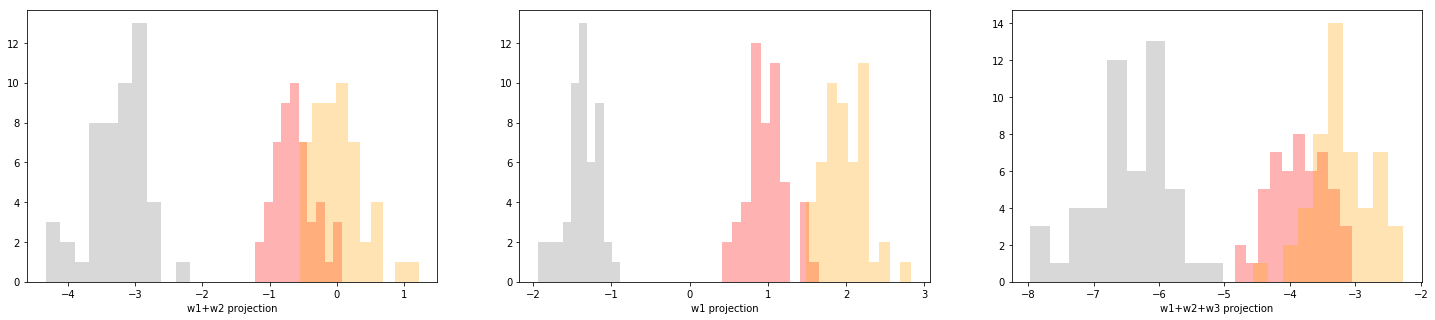

In [60]:
Y_se4=np.dot(setosa,w_prim)
Y_ve4=np.dot(versicolor,w_prim)
Y_vi4=np.dot(virginica,w_prim)
Y_se4=np.asarray(Y_se4,dtype='float')
Y_ve4=np.asarray(Y_ve4,dtype='float')
Y_vi4=np.asarray(Y_vi4,dtype='float')

Y_se5=np.dot(setosa,w_prim1)
Y_ve5=np.dot(versicolor,w_prim1)
Y_vi5=np.dot(virginica,w_prim1)
Y_se5=np.asarray(Y_se5,dtype='float')
Y_ve5=np.asarray(Y_ve5,dtype='float')
Y_vi5=np.asarray(Y_vi5,dtype='float')
fig,ax=plt.subplots(figsize=(25,5),nrows=1,ncols=3)
ax[0].hist(Y_se4,bins=10,color='grey',alpha=0.3)
ax[0].hist(Y_ve4,bins=10,color='r',alpha=0.3)
ax[0].hist(Y_vi4,bins=10,color='orange',alpha=0.3)
ax[0].set_xlabel('w1+w2 projection',fontsize=10)
ax[2].hist(Y_se5,bins=10,color='grey',alpha=0.3)
ax[2].hist(Y_ve5,bins=10,color='r',alpha=0.3)
ax[2].hist(Y_vi5,bins=10,color='orange',alpha=0.3)
ax[2].set_xlabel('w1+w2+w3 projection',fontsize=10)


ax[1].hist(Y_se,bins=10,color='grey',alpha=0.3)
ax[1].hist(Y_ve,bins=10,color='r',alpha=0.3)
ax[1].hist(Y_vi,bins=10,color='orange',alpha=0.3)
ax[1].set_xlabel('w1 projection',fontsize=10)



In [63]:
from numpy.linalg import matrix_rank
matrix_rank(M)

2